In [258]:
import prody as pr
import py3Dmol
import tempfile
import pandas as pd
from PlotUtils import *
from scipy.ndimage import binary_dilation
import matplotlib.patches as mpatches
from IPython.display import display, HTML
from Bio import PDB
from Bio import pairwise2
from Bio.PDB import Superimposer
import py3Dmol
import ipywidgets as widgets
from Bio.PDB import PDBParser
from Bio import pairwise2
import py3Dmol
from Bio import PDB, Align
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Polypeptide import three_to_one
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

In [259]:
fold_pair = str(input('Enter your fold swiching pair pdb ids separate with _ and with the chain at the end (ex: 3hdfA_3hdeA): \n'))


Enter your fold swiching pair pdb ids separate with _ and with the chain at the end (ex: 3hdfA_3hdeA): 
4dxrA_4dxtA


In [260]:
plot_tool = PlotTool(folder='/Users/steveabecassis/Desktop/Pipeline', fold_pair=fold_pair)

@> 1705 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1679 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [261]:
try:
    seq_fold1 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
    seq_fold2 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
except:
    try:
        seq_fold1 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
        seq_fold2 = seq_fold1
    except:
        seq_fold2 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
        seq_fold1 = seq_fold2
        
# fold1_idxs,fold2_idxs = get_align_indexes(seq_fold1, seq_fold2)

# Visualizations and results

## Original Structure Visualization

In [262]:
pdb_file1 = read_pdb_file(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
plot_tool.plot_single_fold(pdb_file1,label=plot_tool.fold1)

pdb_file2 = read_pdb_file(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
plot_tool.plot_single_fold(pdb_file2,label=plot_tool.fold2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [263]:
try:
    plot_tool.plot_fold_alignement_(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb',f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
except:
    print('plot fail !')

@> 1705 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1679 atoms and 1 coordinate set(s) were parsed in 0.02s.


4dxtA_TEMP
Blue:4dxrA
Red:4dxtA


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## AlphaFold predictions

### Best AF prediction to fold 1

In [264]:
df_af = pd.read_csv(f'{plot_tool.folder}/{fold_pair}/Analysis/df_af.csv')
df_af = df_af[df_af.cluster_num != 'Query'].iloc[:,1:-1]

In [266]:
try:
    max_af_pdb1 = df_af[df_af.score_pdb1 > df_af.score_pdb2].sort_values(by='score_pdb1',ascending=False).pdb_file.iloc[0]
    max_af_pdb1 = f'{plot_tool.folder}/{fold_pair}/AF_preds/{max_af_pdb1}'
    try:
        MAX_AF_1 = max_af_pdb1.split('/')[-1][11:14]
    except Exception as e:
        MAX_AF_1 = ''
        print(e)
    pdb_file1_ = f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb'
    score = df_af[df_af.score_pdb1 > df_af.score_pdb2].sort_values(by='score_pdb1',ascending=False).score_pdb1.iloc[0]
    plot_tool.align_and_visualize_pdb(max_af_pdb1,pdb_file1_,score)
except:
    try:
        plot_tool.plot_fold_alignement_(max_af_pdb1,pdb_file1_)
    except:
        MAX_AF_1 = ''
        print('No max_af_pdb1')

@> 1553 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1705 atoms and 1 coordinate set(s) were parsed in 0.03s.


Blue:ShallowMsa_047_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000
Red:4dxrA


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Best AF prediction to fold 2

In [267]:
MAX_AF_2 = ''
max_af_pdb2 = ''
try:
    max_af_pdb2 = df_af[df_af.score_pdb1 < df_af.score_pdb2].sort_values(by='score_pdb2',ascending=False).pdb_file.iloc[0]
    max_af_pdb2 = f'{plot_tool.folder}/{fold_pair}/AF_preds/{max_af_pdb2}'
    try:
        MAX_AF_2 = max_af_pdb2.split('/')[-1][11:14]
    except Exception as e:
        MAX_AF_2 = ''
        print(e)
    pdb_file2_ = f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb'
    score = df_af[df_af.score_pdb1 < df_af.score_pdb2].sort_values(by='score_pdb2',ascending=False).score_pdb2.iloc[0]
    plot_tool.align_and_visualize_pdb(max_af_pdb2,pdb_file2_,score)
except:
    try:
        plot_tool.plot_fold_alignement_(max_af_pdb2,pdb_file2_)
    except:
        MAX_AF_2 = ''
        print('No max_af_pdb2')

@> 1553 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1679 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1553 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 1679 atoms and 1 coordinate set(s) were parsed in 0.03s.


No max_af_pdb2


In [290]:
# df_af[df_af.score_pdb1 >df_af.score_pdb2].sort_values(by='score_pdb1',ascending=False).iloc[0]

df_af[df_af.score_pdb1 <df_af.score_pdb2].sort_values(by='score_pdb2',ascending=False).iloc[0]


pdb_file       ShallowMsa_018_unrelaxed_rank_002_alphafold2_p...
score_pdb1                                               0.83359
score_pdb2                                               0.85362
Fold                                                        4dxt
cluster_num                                                  018
Name: 96, dtype: object

In [269]:
df_esmfold_analysis = pd.read_csv(f'{plot_tool.folder}_res/df_esmfold_analysis.csv')


## EsmFold Prediction


In [291]:
df_esmfold_analysis = pd.read_csv(f'{plot_tool.folder}_res/df_esmfold_analysis.csv')
df_esmfold = df_esmfold_analysis[df_esmfold_analysis.fold_pair == fold_pair]
df_esmfold = df_esmfold[df_esmfold.fold.str.contains('ShallowMsa')]
df_esmfold.head()

,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
17221,4dxrA_4dxtA,ShallowMsa_000_1.pdb,0.72351,0.72546,000,0.743708,0.742758,10,1,0,1,0
17222,4dxrA_4dxtA,ShallowMsa_000_0.pdb,0.72351,0.72546,000,0.743708,0.742758,10,1,0,1,0
17223,4dxrA_4dxtA,ShallowMsa_000_2.pdb,0.75519,0.74954,000,0.743708,0.742758,10,1,0,1,0
17224,4dxrA_4dxtA,ShallowMsa_000_3.pdb,0.74263,0.73833,000,0.743708,0.742758,10,1,0,1,0
17225,4dxrA_4dxtA,ShallowMsa_000_7.pdb,0.74973,0.74299,000,0.743708,0.742758,10,1,0,1,0


In [293]:
df_esmfold[df_esmfold.cluster_num=='018']

,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
17401,4dxrA_4dxtA,ShallowMsa_018_3.pdb,0.77803,0.77228,018,0.784589,0.781793,10,1,0,1,0
17402,4dxrA_4dxtA,ShallowMsa_018_2.pdb,0.77657,0.77223,018,0.784589,0.781793,10,1,0,1,0
17403,4dxrA_4dxtA,ShallowMsa_018_0.pdb,0.77673,0.77426,018,0.784589,0.781793,10,1,0,1,0
17404,4dxrA_4dxtA,ShallowMsa_018_1.pdb,0.81098,0.80622,018,0.784589,0.781793,10,1,0,1,0
17405,4dxrA_4dxtA,ShallowMsa_018_5.pdb,0.76909,0.76947,018,0.784589,0.781793,10,1,0,1,0
17406,4dxrA_4dxtA,ShallowMsa_018_4.pdb,0.79046,0.78450,018,0.784589,0.781793,10,1,0,1,0
17407,4dxrA_4dxtA,ShallowMsa_018_6.pdb,0.78054,0.78233,018,0.784589,0.781793,10,1,0,1,0
17408,4dxrA_4dxtA,ShallowMsa_018_7.pdb,0.77824,0.76702,018,0.784589,0.781793,10,1,0,1,0
17409,4dxrA_4dxtA,ShallowMsa_018_9.pdb,0.80053,0.80449,018,0.784589,0.781793,10,1,0,1,0
17410,4dxrA_4dxtA,ShallowMsa_018_8.pdb,0.78472,0.78513,018,0.784589,0.781793,10,1,0,1,0


### Best EsmFold prediction to fold 1

In [271]:
# df_esmfold[df_esmfold.cluster_num =='022']

In [272]:
try:
    max_esm_pdb1 = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 > df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold1',ascending=False).fold.iloc[0]
    score = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 > df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold1',ascending=False).TMscore_fold1.iloc[0]
#     max_esm_pdb1_ = read_pdb_file(f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
#     plot_tool.plot_single_fold(max_esm_pdb1_,label='MAX ESM TM PDB1')
#     visualize_alignement_structure(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
    plot_tool.align_and_visualize_pdb(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}',score)
except Exception as e:
    print(e)
    try:
        plot_tool.plot_fold_alignement_(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
    except Exception as e:
        print(e)
    

@> 1705 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1551 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1705 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1551 atoms and 1 coordinate set(s) were parsed in 0.02s.


reference and target coordinate arrays must have same number of atoms
An invalid selection string is encountered:
'resnum '
 ^ must be followed by values


### Best EsmFold prediction to fold 2

In [273]:
try:
    max_esm_pdb2 = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 <df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold2',ascending=False).fold.iloc[0]
    score = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 < df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold2',ascending=False).TMscore_fold2.iloc[0]
    plot_tool.align_and_visualize_pdb(pdb_file2_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb2}',score)
    print(score)
except Exception as e:
    print(e)
    try:
        print(score)
        plot_tool.plot_fold_alignement_(pdb_file2_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb2}')
    except Exception as e:
        print(e)
    

@> 1679 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1553 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1679 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1553 atoms and 1 coordinate set(s) were parsed in 0.02s.


reference and target coordinate arrays must have same number of atoms
0.83227
An invalid selection string is encountered:
'resnum '
 ^ must be followed by values


In [274]:
df_esmfold





,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
17221,4dxrA_4dxtA,ShallowMsa_000_1.pdb,0.72351,0.72546,000,0.743708,0.742758,10,1,0,1,0
17222,4dxrA_4dxtA,ShallowMsa_000_0.pdb,0.72351,0.72546,000,0.743708,0.742758,10,1,0,1,0
17223,4dxrA_4dxtA,ShallowMsa_000_2.pdb,0.75519,0.74954,000,0.743708,0.742758,10,1,0,1,0
17224,4dxrA_4dxtA,ShallowMsa_000_3.pdb,0.74263,0.73833,000,0.743708,0.742758,10,1,0,1,0
17225,4dxrA_4dxtA,ShallowMsa_000_7.pdb,0.74973,0.74299,000,0.743708,0.742758,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17796,4dxrA_4dxtA,ShallowMsa_057_3.pdb,0.85568,0.83308,057,0.864882,0.845855,10,1,0,1,0
17797,4dxrA_4dxtA,ShallowMsa_057_7.pdb,0.86579,0.84642,057,0.864882,0.845855,10,1,0,1,0
17798,4dxrA_4dxtA,ShallowMsa_057_6.pdb,0.84975,0.82976,057,0.864882,0.845855,10,1,0,1,0
17799,4dxrA_4dxtA,ShallowMsa_057_4.pdb,0.85276,0.83227,057,0.864882,0.845855,10,1,0,1,0


## Contact maps Msa Transformers

In [275]:
import pyarrow
df_cmap = pd.read_parquet('/Users/steveabecassis/Desktop/Pipeline/cmap_exact_analysis_tol0.parq')
df_cmap = df_cmap[df_cmap.FoldPair == fold_pair]
try:
    MAX_RECALL_1 = df_cmap[df_cmap.recall_only_fold1 > df_cmap.recall_only_fold2].sort_values(by='recall_only_fold1',ascending=False).iloc[0]
    MAX_CLUSTER_RECALL_1 = MAX_RECALL_1.File[-7:-4]
except:
    MAX_CLUSTER_RECALL_1 = ''
try:
    MAX_RECALL_2 = df_cmap[df_cmap.recall_only_fold1 < df_cmap.recall_only_fold2].sort_values(by='recall_only_fold2',ascending=False).iloc[0]
    MAX_CLUSTER_RECALL_2 = MAX_RECALL_2.File[-7:-4]
except:
    MAX_CLUSTER_RECALL_2 = ''
    

In [276]:
# df_cmap = pd.read_parquet('/Users/steveabecassis/Desktop/Pipeline/cmap_exact_analysis_tol0.parq')
# df_cmap.FoldPair.unique()

In [277]:
viz_folder = f'/Users/steveabecassis/Desktop/Pipeline/{fold_pair}/output_cmap_esm/VizCmaps'
if MAX_CLUSTER_RECALL_1 != '':
    file_max_recall_1 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_CLUSTER_RECALL_1}_visualization_map_1_tol_0.npy'
else:
    file_max_recall_1 = ''

if MAX_CLUSTER_RECALL_2 != '':
    file_max_recall_2 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_CLUSTER_RECALL_2}_visualization_map_2_tol_0.npy'
else:
    file_max_recall_2 = ''

In [278]:
def plot_viz_cmap(file,legend_plot):
    # Create a sample 2D numpy array (replace this with your actual data)
    visualization_map = np.load(file)
    size = 50
    data = np.random.choice([0, 1, 1.25, 1.5, 1.75], size=(size, size))

    # Create a custom colormap
    colors = ['grey', 'lightblue', 'purple', 'blue', 'magenta']
    values = [0, 1, 1.25, 1.5, 1.75]
    bounds = [0, 0.99, 1.24, 1.49, 1.74, 2]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # Create the plot
    plt.figure(figsize=(10, 8))
    im = plt.imshow(visualization_map, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

    # Create legend elements
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
        Patch(facecolor='purple', edgecolor='black', label='Unique State Experiment contact'),
        Patch(facecolor='blue', edgecolor='black', label='Experiment contact predicted'),
        Patch(facecolor='magenta', edgecolor='black', label='Unique State Experiment contact predicted')
    ]

    # Add the legend
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set title and labels
    plt.title(legend_plot)
    plt.xlabel('Residue Index')
    plt.ylabel('Residue Index')

    # Adjust layout to make room for the legend
    plt.tight_layout()

    # Show the plot
    plt.show()

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

def plot_viz_cmap_(file1, file2, legend_plot):
    # Load the two 2D numpy arrays
    visualization_map1 = np.load(file1)
    visualization_map2 = np.load(file2)
    
    # Ensure both arrays have the same shape
    assert visualization_map1.shape == visualization_map2.shape, "Both input arrays must have the same shape"
    
    # Create a combined array
    combined_map = np.tril(visualization_map1) + np.triu(visualization_map2, k=1)
    
    # Create a custom colormap
    colors = ['grey','blue','lightblue','purple','blue','magenta']
    bounds = [0, 0.49, 0.99, 1.24, 1.49, 1.74, 2]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # Create the plot
    plt.figure(figsize=(10,8))
    im = plt.imshow(combined_map, cmap=cmap, norm=norm, interpolation='nearest', origin='lower')

    # Create legend elements
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
        Patch(facecolor='purple', edgecolor='black'   , label='Unique State Experiment contact'),
        Patch(facecolor='blue', edgecolor='black'     , label='Predicted contacts'),
        Patch(facecolor='magenta', edgecolor='black'  , label='Unique State Experiment contact predicted')
    ]

    # Add the legend
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set title and labels
    plt.title(legend_plot)
    plt.xlabel('Residue Index')
    plt.ylabel('Residue Index')

    # Adjust layout to make room for the legend
    plt.tight_layout()

    # Show the plot
    plt.show()

In [280]:
MAX_AF_1_ = '022'
MAX_AF_1_

'022'

In [281]:
#df_cmap[df_cmap.File.str.contains(MAX_AF_1)]
#c = np.load(f'/Users/steveabecassis/Desktop/Pipeline/4zrbH_4zrbC/output_cmap_esm/{df_cmap[df_cmap.File.str.contains(MAX_AF_1_)].File.iloc[0]}')
#c[c > 0.3] = 1
#c[c <= 0.3] = 0
#plt.imshow(c,origin='lower')

In [282]:
file_max_recall_2

'/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/output_cmap_esm/VizCmaps/msa_t__ShallowMsa_002_visualization_map_2_tol_0.npy'

In [283]:
file_max_recall_1

'/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/output_cmap_esm/VizCmaps/msa_t__ShallowMsa_012_visualization_map_1_tol_0.npy'

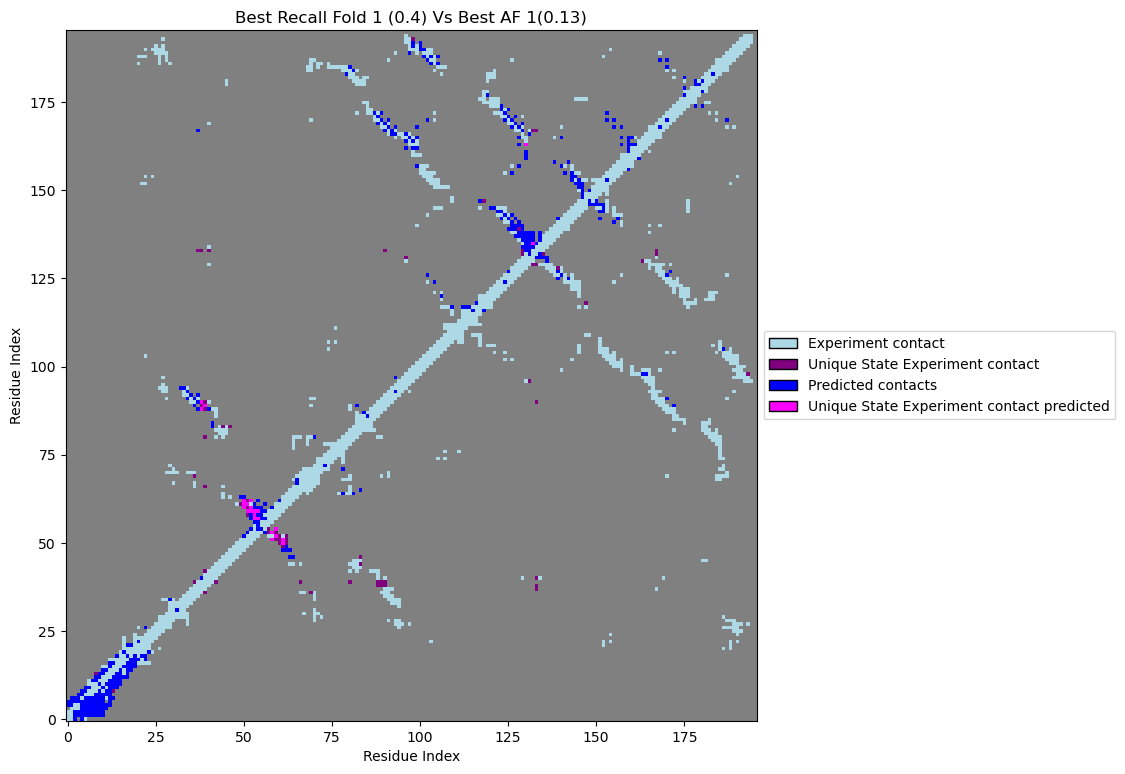

In [294]:
if (file_max_recall_1) and (MAX_AF_1) : 
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_1)].recall_only_fold1.iloc[0]
    plot_viz_cmap_(f'{file_max_recall_1}',f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_1.recall_only_fold1}) Vs Best AF 1({af_cmap_recall})')
elif (file_max_recall_1):
    plot_viz_cmap(f'{file_max_recall_1}',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_1.recall_only_fold1})')
elif (MAX_AF_1):
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_1)].recall_only_fold1.iloc[0]
    plot_viz_cmap(f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy',legend_plot=f'Best AF 1({af_cmap_recall})')
    
    

In [296]:
MAX_AF_2 = '018'

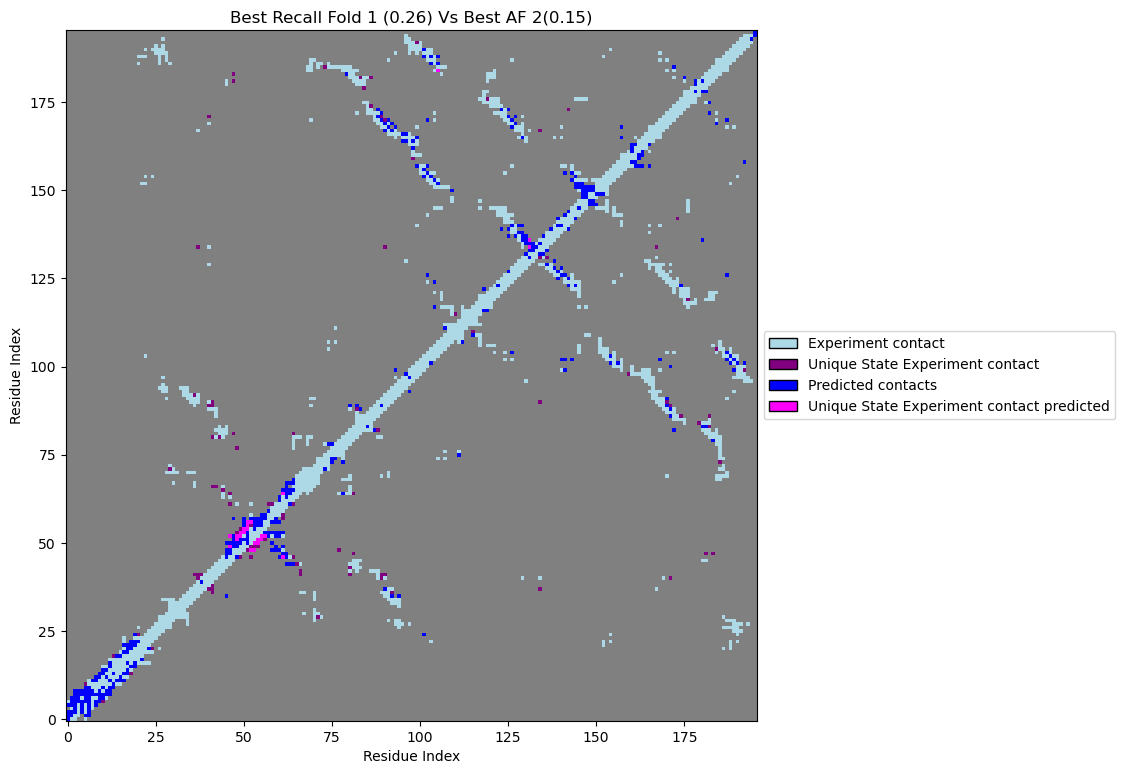

In [297]:

if (file_max_recall_2) and (MAX_AF_2) : 
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_2)].recall_only_fold2.iloc[0]
    plot_viz_cmap_(f'{file_max_recall_2}',f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_2.recall_only_fold2}) Vs Best AF 2({af_cmap_recall})')
elif (file_max_recall_2):
    plot_viz_cmap(f'{file_max_recall_2}',legend_plot=f'Best Recall Fold 2 ({MAX_RECALL_2.recall_only_fold2})')
elif (MAX_AF_2):
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_2)].recall_only_fold2.iloc[0]
    plot_viz_cmap(f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy',legend_plot=f'Best AF 2 ({af_cmap_recall})')
    
    

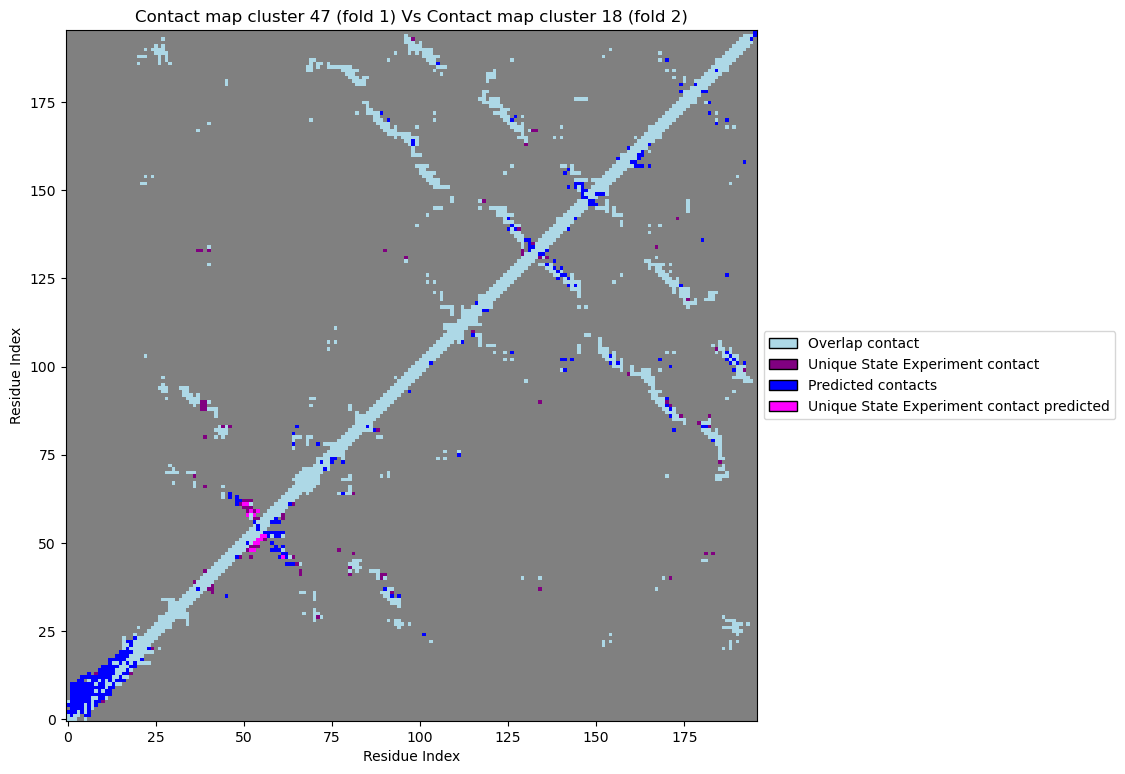

In [300]:
file1 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy'
file2 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy'


legend_plot=f'Contact map cluster 47 (fold 1) Vs Contact map cluster 18 (fold 2)'

# Load the two 2D numpy arrays
visualization_map1 = np.load(file1)
visualization_map2 = np.load(file2)
# Ensure both arrays have the same shape
assert visualization_map1.shape == visualization_map2.shape, "Both input arrays must have the same shape"

# Create a combined array
combined_map = np.tril(visualization_map1) + np.triu(visualization_map2, k=1)

# Create a custom colormap
colors = ['grey','blue','lightblue','purple','blue','magenta']
bounds = [0, 0.49, 0.99, 1.24, 1.49, 1.74, 2]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

# Create the plot
plt.figure(figsize=(10,8))
im = plt.imshow(combined_map, cmap=cmap, norm=norm, interpolation='nearest', origin='lower')

# Create legend elements
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Overlap contact'),
    Patch(facecolor='purple', edgecolor='black'   , label='Unique State Experiment contact'),
    Patch(facecolor='blue', edgecolor='black'     , label='Predicted contacts'),
    Patch(facecolor='magenta', edgecolor='black'  , label='Unique State Experiment contact predicted')
]

# Add the legend
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Set title and labels
plt.title(legend_plot)
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

In [307]:
def get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1):
    pdb_obj = md.load_pdb(pdb_file)
    distances, pairs = md.compute_contacts(pdb_obj)
    contacts = md.geometry.squareform(distances, pairs)[0]
    if size is None:
        size = contacts.shape[0]
    arr = np.zeros([size, size])
    arr[np.where(contacts[start_pos:end_pos, start_pos:end_pos] < 0.5)] = 1
    return arr
def plot_cmap(frame_contacts):
    fig, ax = frame_contacts.residue_contacts.plot()
    plt.xlabel("Residue")
    xlim = frame_contacts.query_residue_range[-1]
    plt.xlim([0, xlim])
    plt.ylim([0, xlim])
    _ = plt.ylabel("Residue")

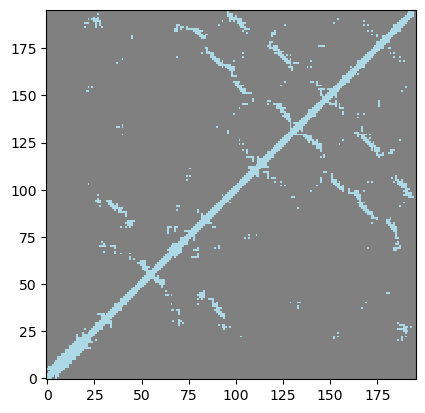

In [313]:
pdb_file = '/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/chain_pdb_files/4dxrA.pdb'
a = get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1)
plt.imshow(a, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

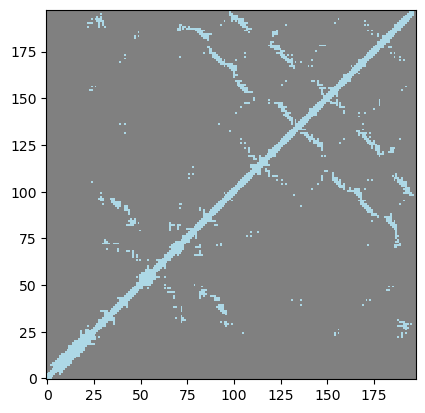

In [314]:
pdb_file = '/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/chain_pdb_files/4dxtA.pdb'
a = get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1)
plt.imshow(a, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

In [302]:
!cat PlotUtils.py

import prody as pr
import py3Dmol
import tempfile
from contact_map import OverrideTopologyContactDifference
import matplotlib.pyplot as plt
import mdtraj as md
from contact_map import ContactFrequency, ContactDifference
import warnings
warnings.filterwarnings("ignore")
import mdtraj as md
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import prody
import os
from scipy.ndimage import binary_dilation
import matplotlib.patches as mpatches
from IPython.display import display, HTML
from Bio import PDB
from Bio import pairwise2
from Bio.PDB import Superimposer
import py3Dmol
import ipywidgets as widgets
from Bio.PDB import PDBParser
from Bio import pairwise2
import py3Dmol
from Bio import PDB, Align
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Polypeptide import three_to_one
from io import StringIO
import numpy as np

# Function to read PDB file
def read_pdb_file(file_path):
    with open(file_path, 'r') as file:



def get_seq_from_structure(structur

In [287]:
file = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy'
legend_plot = ''
# Create a sample 2D numpy array (replace this with your actual data)
visualization_map = np.load(file)[-82:, -82:]
size = 50
data = np.random.choice([0, 1, 1.25, 1.5, 1.75], size=(size, size))

# Create a custom colormap
colors = ['grey', 'lightblue', 'purple', 'blue', 'magenta']
values = [0, 1, 1.25, 1.5, 1.75]
bounds = [0, 0.99, 1.24, 1.49, 1.74, 2]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

# Create the plot
plt.figure(figsize=(10, 8))
im = plt.imshow(visualization_map, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

# Create legend elements
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
    Patch(facecolor='purple', edgecolor='black', label='Unique State Experiment contact'),
    Patch(facecolor='blue', edgecolor='black', label='Experiment contact predicted'),
    Patch(facecolor='magenta', edgecolor='black', label='Unique State Experiment contact predicted')
]

# Add the legend
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Set title and labels
plt.title(legend_plot)
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/output_cmap_esm/VizCmaps/msa_t__ShallowMsa__visualization_map_2_tol_0.npy'